1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2. Load dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Define classes

In [3]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


4.Preprocessing

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

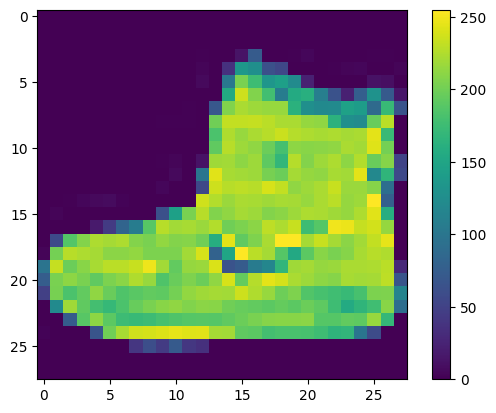

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0


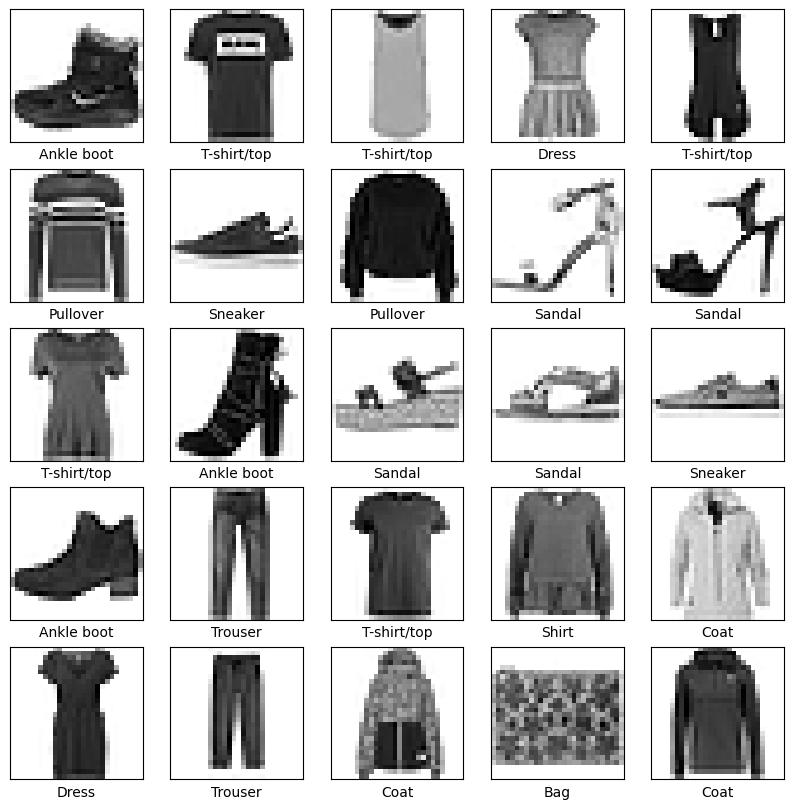

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


5.Model Building & Evaluation

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=30)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7823 - loss: 0.6288
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8628 - loss: 0.3811
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8773 - loss: 0.3412
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8874 - loss: 0.3094
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8928 - loss: 0.2947
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8951 - loss: 0.2828
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9009 - loss: 0.2638
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9053 - loss: 0.2567
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9088 - loss: 0.2430
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9135 - loss: 0.2334
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9153 - loss: 0.2287
Epoch 12/30
1875/1875 ━━━━━━

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8906 - loss: 0.3920

Test accuracy: 0.8906000256538391


6.Prediction and Visualization

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
print(predictions[0])

[1.7454750e-19 4.2240579e-20 3.8677793e-20 7.9866353e-22 4.5776869e-22
 1.9948715e-07 2.2986247e-18 1.3439887e-04 4.8103742e-19 9.9986553e-01]


In [18]:
print(np.argmax(predictions[0]))

9


In [19]:
print(test_labels[0])

9


In [20]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)


In [21]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


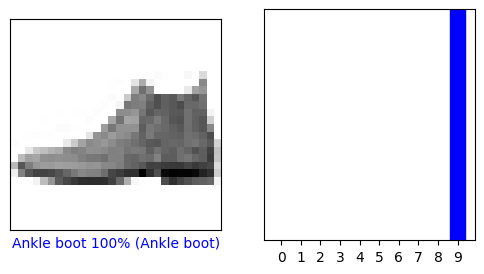

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


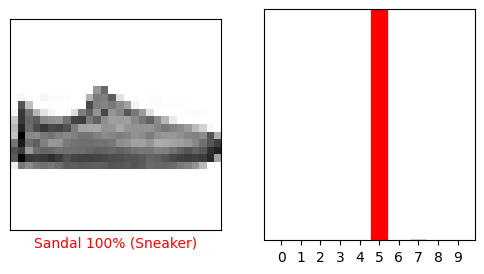

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


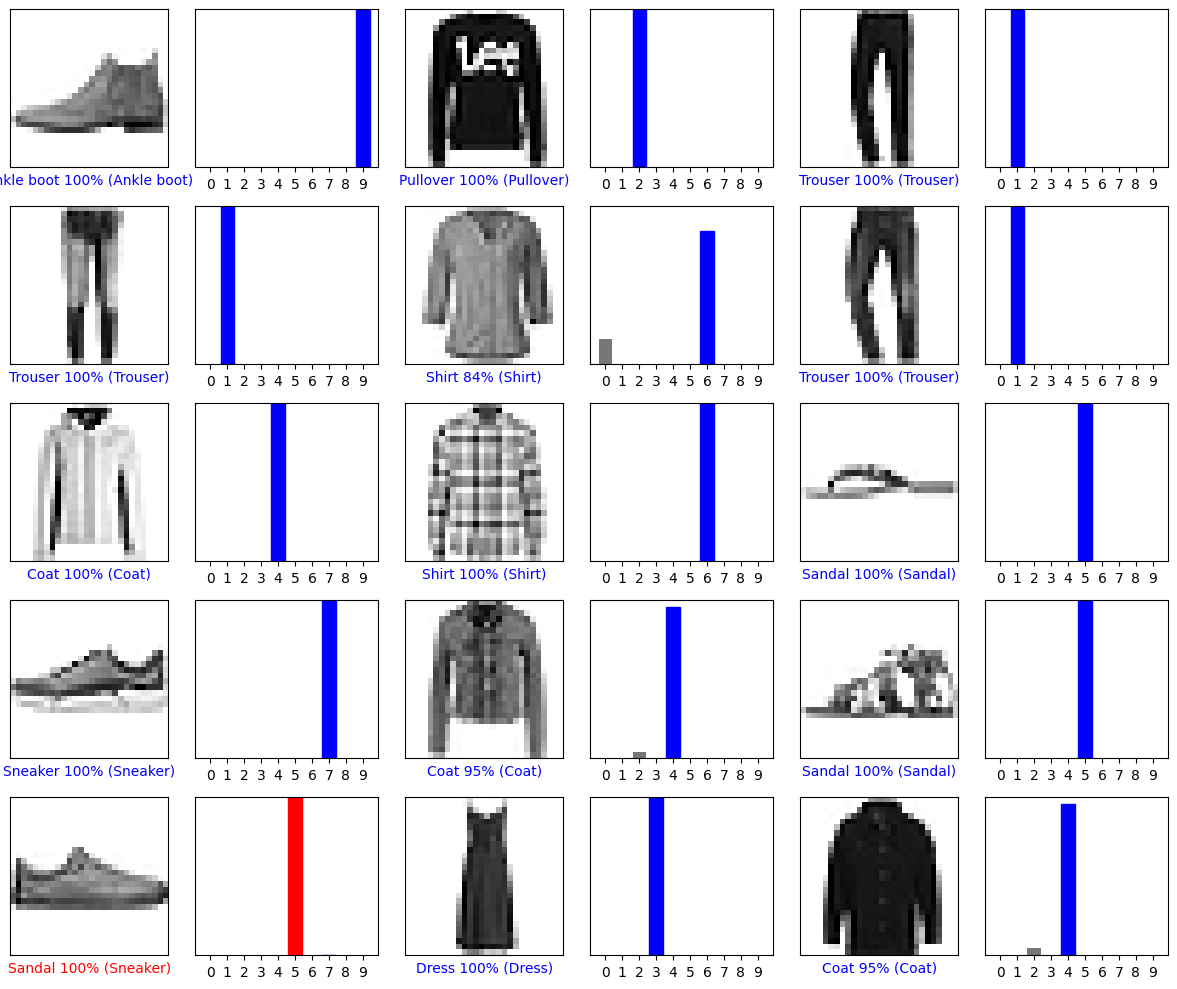

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()


In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[7.0704095e-06 2.9874434e-26 9.9997163e-01 5.1242892e-18 1.9873072e-05
  2.3663161e-22 1.3862576e-06 3.7945156e-20 9.4538639e-16 6.0657006e-20]]


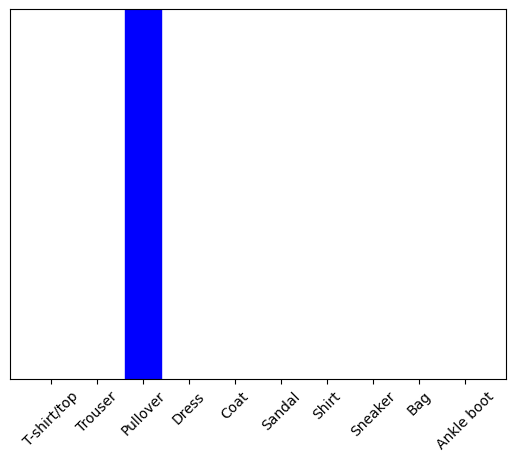

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
print(np.argmax(predictions_single[0]))

2


### **Theory:**

Convolutional Neural Networks (CNNs) are a type of deep learning model primarily used for processing structured grid-like data, such as images. CNNs are widely recognized for their success in computer vision tasks, including image classification, object detection, segmentation, and even tasks beyond images, such as speech recognition.

A CNN is designed to automatically and adaptively learn spatial hierarchies of features through the application of convolutional layers, pooling layers, and fully connected layers. These layers allow the network to learn various levels of abstraction in the data, starting from simple patterns such as edges in the lower layers, to more complex shapes or objects in higher layers.

### **Key Components of a CNN**

- **Convolutional Layer:**  
  The core building block of a CNN, which applies a convolution operation to the input data. This operation involves a filter (also known as a kernel) that slides over the input and computes the dot product between the filter and the region of the input it is currently covering. The result is a feature map that highlights the presence of specific features in the input.

  This layer helps in learning spatial features like edges, corners, textures, and shapes in the image.

- **Activation Function:**  
  Typically, a **ReLU (Rectified Linear Unit)** activation function is used after each convolution operation. ReLU introduces non-linearity to the model, allowing it to learn more complex patterns.
  
  ReLU is defined as:

  $\text{ReLU}(x) = \max(0, x)$

  
  Other activation functions like **sigmoid** or **tanh** can also be used but are less common in modern CNNs.

- **Pooling Layer:**  
  Pooling layers reduce the spatial dimensions (height and width) of the feature maps while retaining important information. This helps in reducing the number of parameters and computation.

  The most common type of pooling is **max pooling**, which takes the maximum value from each region of the feature map covered by the pooling window. Another type is **average pooling**, which computes the average of the values in the pooling window.

- **Fully Connected Layer:**  
  After several convolutional and pooling layers, the final feature maps are flattened into a one-dimensional vector and passed through fully connected layers. These layers are similar to regular neural network layers and are used to perform the final classification or regression task based on the learned features.

- **Output Layer:**  
  For classification tasks, the output layer typically uses a **softmax** activation function to produce a probability distribution over the possible classes. For binary classification, the **sigmoid** function is often used to output a single probability.

### **Why CNNs Are Effective**

- **Local Receptive Fields:**  
  In CNNs, each neuron in a convolutional layer is only connected to a small region of the input, called the receptive field. This allows the network to focus on local patterns in the data.

- **Shared Weights:**  
  This parameter sharing significantly reduces the number of parameters in the model and allows CNNs to efficiently learn patterns regardless of their position in the image.

- **Translation Invariance:**  
  Since the convolutional filters are applied to every region of the image, CNNs are invariant to small translations of the input.
